In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os

df = pd.read_csv('/content/jm1.csv')

df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [ ]:
object_columns = ['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']

df[object_columns] = df[object_columns].apply(pd.to_numeric, errors='coerce')

missing_values = df.isnull().sum()

summary_statistics = df.describe()

missing_values, summary_statistics

(loc                  0
 v(g)                 0
 ev(g)                0
 iv(g)                0
 n                    0
 v                    0
 l                    0
 d                    0
 i                    0
 e                    0
 b                    0
 t                    0
 lOCode               0
 lOComment            0
 lOBlank              0
 locCodeAndComment    0
 uniq_Op              5
 uniq_Opnd            5
 total_Op             5
 total_Opnd           5
 branchCount          5
 defects              0
 dtype: int64,
                 loc          v(g)         ev(g)         iv(g)             n  \
 count  10885.000000  10885.000000  10885.000000  10885.000000  10885.000000   
 mean      42.016178      6.348590      3.401047      4.001599    114.389738   
 std       76.593332     13.019695      6.771869      9.116889    249.502091   
 min        1.000000      1.000000      1.000000      1.000000      0.000000   
 25%       11.000000      2.000000      1.000000      1.0

In [ ]:
df = df.replace('?', np.nan)

for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        pass

trace = go.Histogram(
    x=df.defects,
    opacity=0.75,
    name="Defects",
    marker=dict(color='green'))

hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title='Defects',
                   xaxis=dict(title='True - False'),
                   yaxis=dict(title='Frequency'),
)
fig = go.Figure(data=hist_data, layout=hist_layout)
iplot(fig)

df.corr()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,1.000000,0.817757,0.517551,0.784057,0.881795,0.900293,-0.286587,0.689543,0.499946,0.750564,...,0.921918,0.612858,0.803573,0.278119,0.536681,0.764622,0.880967,0.868275,0.830194,0.245388
v(g),0.817757,1.000000,0.701710,0.859590,0.730781,0.759881,-0.252902,0.669057,0.303031,0.709501,...,0.799915,0.384506,0.538366,0.209811,0.647430,0.700514,0.744164,0.696078,0.971958,0.208644
ev(g),0.517551,0.701710,1.000000,0.639574,0.465992,0.445902,-0.233982,0.434009,0.213211,0.315538,...,0.454604,0.294208,0.338243,0.190911,0.263000,0.337031,0.479935,0.435518,0.785553,0.172973
iv(g),0.784057,0.859590,0.639574,1.000000,0.702415,0.743193,-0.197736,0.575369,0.309717,0.757702,...,0.775873,0.351583,0.541296,0.207028,0.500750,0.617966,0.715244,0.668940,0.858994,0.181984
n,0.881795,0.730781,0.465992,0.702415,1.000000,0.984276,-0.240749,0.808113,0.651209,0.716536,...,0.944383,0.596374,0.798561,0.284391,0.610412,0.836171,0.995689,0.989484,0.747894,0.204143
v,0.900293,0.759881,0.445902,0.743193,0.984276,1.000000,-0.198104,0.752206,0.598743,0.800000,...,0.962078,0.576844,0.792330,0.266537,0.606993,0.852296,0.981565,0.971960,0.759971,0.189136
l,-0.286587,-0.252902,-0.233982,-0.197736,-0.240749,-0.198104,1.000000,-0.347215,-0.166801,-0.062026,...,-0.218373,-0.165885,-0.223670,-0.106117,-0.305331,-0.234892,-0.237325,-0.241023,-0.279126,-0.164917
d,0.689543,0.669057,0.434009,0.575369,0.808113,0.752206,-0.347215,1.000000,0.398162,0.574298,...,0.768188,0.502121,0.637211,0.253793,0.749305,0.639686,0.817546,0.777732,0.671976,0.169629
i,0.499946,0.303031,0.213211,0.309717,0.651209,0.598743,-0.166801,0.398162,1.000000,0.209268,...,0.563920,0.392551,0.572352,0.217810,0.391646,0.726696,0.620676,0.687891,0.325796,0.192831
e,0.750564,0.709501,0.315538,0.757702,0.716536,0.800000,-0.062026,0.574298,0.209268,1.000000,...,0.809070,0.384806,0.600649,0.148693,0.482061,0.586805,0.735802,0.673490,0.667886,0.086036


In [ ]:
df_cleaned = df.dropna()

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
    return is_outlier.sum()

numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
outliers_count = df_cleaned[numerical_columns].apply(detect_outliers_iqr)

outliers_count


,0
loc,964
v(g),953
ev(g),1369
iv(g),965
n,1006
v,1106
l,1131
d,574
i,655
e,1578


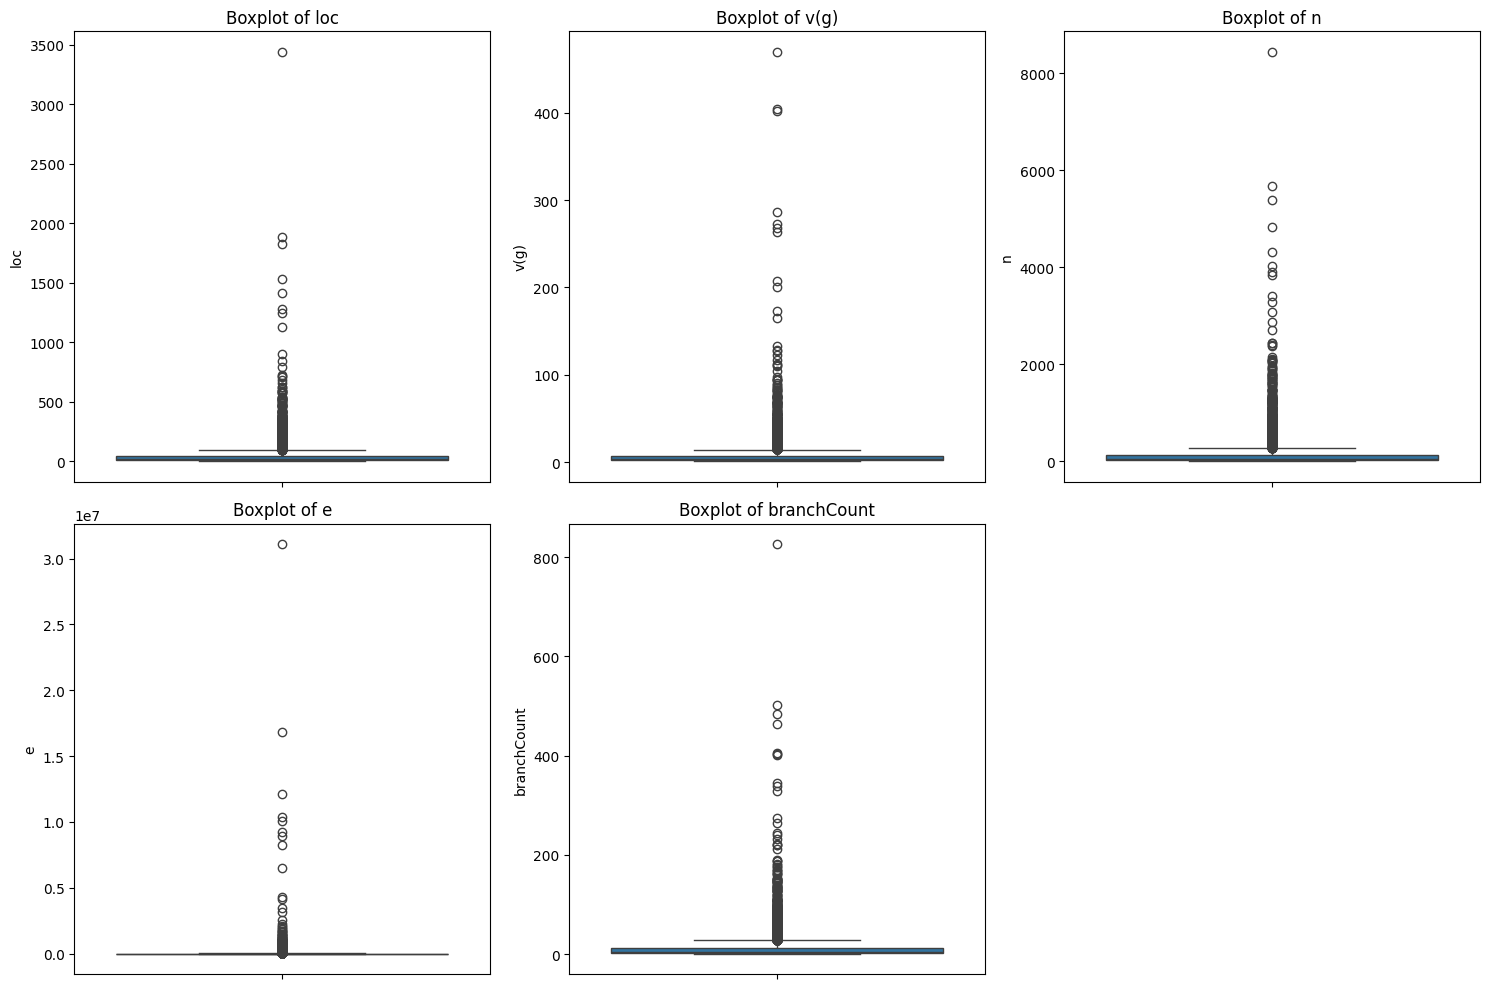

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['loc', 'v(g)', 'n', 'e', 'branchCount']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split

# Load the dataset (assuming it's already cleaned and in 'df_cleaned')
# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_cleaned.select_dtypes(include=[np.number]))

# Split the data into training and test sets
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 14  # You can adjust this as per the compression level needed

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

# Decoder
decoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer="adam", loss="mean_squared_error")

autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test))

reconstructed = autoencoder.predict(X_test)

reconstruction_error = np.mean(np.power(X_test - reconstructed, 2), axis=1)

threshold = np.percentile(reconstruction_error, 95)  # 95th percentile

outliers = reconstruction_error > threshold

print(f"Number of outliers detected: {np.sum(outliers)}")


Epoch 1/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1765 - val_loss: 0.0050
Epoch 2/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 3/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 5/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 6/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 7/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 8/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 9/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0010 - val_loss: 9.2556e-04
Epoch 10/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.2385e-04 - val_loss: 4.6609e-04
Epoch 11/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5436e-04 - val_loss: 4.1113e-04
Epoch 12/50
272/272 ━━━━━━━━━━━━

In [ ]:
defect_true_false = df.groupby('defects')['b'].apply(lambda x: x.count())
print('False: ',defect_true_false[0])
print('True: ',defect_true_false[1])

False:  8779
True:  2106


<ipython-input-72-0aca05d710d3>:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-72-0aca05d710d3>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [ ]:
# Replace '?' with NaN in the entire DataFrame
df = df.replace('?', np.nan)

# Convert relevant columns to numeric (e.g., columns used for correlation)
# Specify the columns you want to convert to numeric (e.g., 'column1', 'column2', etc.)
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()  # Get list of numeric columns

for col in numeric_cols:  # Iterate through only numeric columns
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        # Handle cases where the column cannot be converted to numeric (e.g., string columns)
        pass

trace = go.Histogram(
    x=df.defects,
    opacity=0.75,
    name="Defects",
    marker=dict(color='green'))

hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title='Defects',
                   xaxis=dict(title='True - False'),
                   yaxis=dict(title='Frequency'),
)
fig = go.Figure(data=hist_data, layout=hist_layout)
iplot(fig)

correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix) # print the result

                        loc      v(g)     ev(g)     iv(g)         n         v  \
loc                1.000000  0.817757  0.517551  0.784057  0.881795  0.900293   
v(g)               0.817757  1.000000  0.701710  0.859590  0.730781  0.759881   
ev(g)              0.517551  0.701710  1.000000  0.639574  0.465992  0.445902   
iv(g)              0.784057  0.859590  0.639574  1.000000  0.702415  0.743193   
n                  0.881795  0.730781  0.465992  0.702415  1.000000  0.984276   
v                  0.900293  0.759881  0.445902  0.743193  0.984276  1.000000   
l                 -0.286587 -0.252902 -0.233982 -0.197736 -0.240749 -0.198104   
d                  0.689543  0.669057  0.434009  0.575369  0.808113  0.752206   
i                  0.499946  0.303031  0.213211  0.309717  0.651209  0.598743   
e                  0.750564  0.709501  0.315538  0.757702  0.716536  0.800000   
b                  0.899965  0.759635  0.445693  0.743013  0.983938  0.999696   
t                  0.750564 

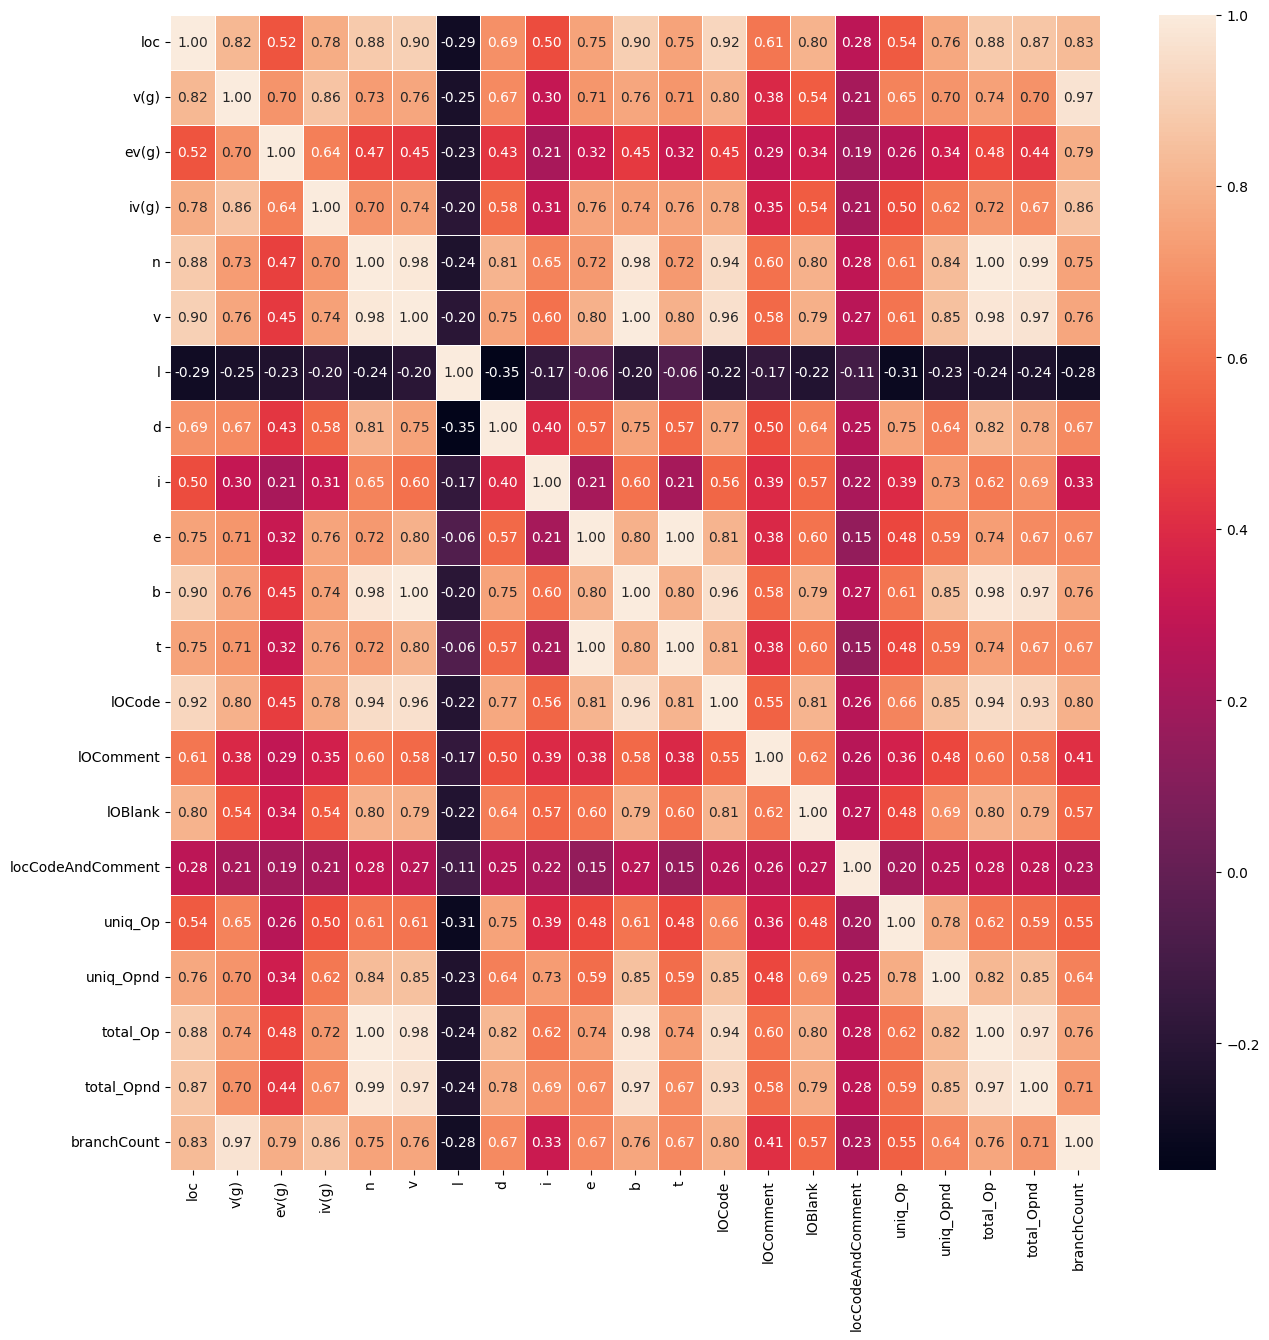

In [ ]:
df = df.replace('?', np.nan)

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

if 'defects' in df.columns and df['defects'].dtype == 'object':
    numeric_cols = [col for col in numeric_cols if col != 'defects']

for col in numeric_cols:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        pass


f,ax = plt.subplots(figsize = (15, 15))

correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot = True, linewidths = .5, fmt = '.2f')

plt.show()

In [ ]:
trace = go.Scatter(
    x=df.v,
    y=df.b,
    mode="markers",
    name="Volume - Bug",
    marker=dict(color='darkblue'),
    text="Bug (b)")

scatter_data = [trace]
scatter_layout = dict(title='Volume - Bug',
              xaxis=dict(title='Volume', ticklen=5),
              yaxis=dict(title='Bug', ticklen=5),
             )
# The 'df' key should be replaced with 'data' for Plotly to recognize the figure data
fig = dict(data=scatter_data, layout=scatter_layout)
iplot(fig)

df.isnull().sum()

,0
loc,0
v(g),0
ev(g),0
iv(g),0
n,0
v,0
l,0
d,0
i,0
e,0


In [ ]:
trace1 = go.Box(
    x = df.uniq_Op,
    name = 'Unique Operators',
    marker = dict(color = 'blue')
    )
box_data = [trace1]
iplot(box_data)
def evaluation_control(df):
      evaluation = (df.n < 300) & (df.v < 1000 ) & (df.d < 50) & (df.e < 500000) & (df.t < 5000)
      df['complexityEvaluation'] = pd.DataFrame(evaluation)
      df['complexityEvaluation'] = ['Succesful' if evaluation == True else 'Redesign' for evaluation in data.complexityEvaluation]


In [ ]:
def evaluation_control(df):
    evaluation = (df.n < 300) & (df.v < 1000 ) & (df.d < 50) & (df.e < 500000) & (df.t < 5000)
    df['complexityEvaluation'] = pd.DataFrame(evaluation)
    df['complexityEvaluation'] = ['Succesful' if evaluation == True else 'Redesign' for evaluation in df.complexityEvaluation]

In [ ]:
evaluation_control(df)
df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,False,Succesful
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1.0,1.0,1.0,1.0,1.0,True,Succesful
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,10,8,1,17.0,36.0,112.0,86.0,13.0,True,Redesign
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,29,28,2,17.0,135.0,329.0,271.0,5.0,True,Redesign
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,1,6,0,11.0,16.0,76.0,50.0,7.0,True,Succesful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,0,2,0,10.0,15.0,30.0,22.0,7.0,False,Succesful
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,0,2,0,12.0,8.0,19.0,11.0,3.0,False,Succesful
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,1,10,0,18.0,15.0,59.0,44.0,7.0,False,Succesful
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,0,2,0,9.0,8.0,21.0,15.0,1.0,False,Succesful


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   10885 non-null  float64
 1   v(g)                  10885 non-null  float64
 2   ev(g)                 10885 non-null  float64
 3   iv(g)                 10885 non-null  float64
 4   n                     10885 non-null  float64
 5   v                     10885 non-null  float64
 6   l                     10885 non-null  float64
 7   d                     10885 non-null  float64
 8   i                     10885 non-null  float64
 9   e                     10885 non-null  float64
 10  b                     10885 non-null  float64
 11  t                     10885 non-null  float64
 12  lOCode                10885 non-null  int64  
 13  lOComment             10885 non-null  int64  
 14  lOBlank               10885 non-null  int64  
 15  locCodeAndComment  

In [ ]:
df.groupby("complexityEvaluation").size()

,0
complexityEvaluation,
Redesign,1725
Succesful,9160


In [ ]:
trace = go.Histogram(
    x=df.complexityEvaluation,
    opacity=0.75,
    name='Complexity Evaluation',
    marker=dict(color='darkorange')
)
hist_data = [trace]
hist_layout = go.Layout(
    barmode='overlay',
    title='Complexity Evaluation',
    xaxis=dict(title='Succesful - Redesign'),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=hist_data, layout=hist_layout)
iplot(fig)

from sklearn import preprocessing

scale_v = df[['v']]
scale_b = df[['b']]

minmax_scaler = preprocessing.MinMaxScaler()

v_scaled = minmax_scaler.fit_transform(scale_v)
b_scaled = minmax_scaler.fit_transform(scale_b)

df['v_ScaledUp'] = pd.DataFrame(v_scaled)
df['b_ScaledUp'] = pd.DataFrame(b_scaled)

df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation,v_ScaledUp,b_ScaledUp
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,1.2,1.2,1.2,1.2,1.4,False,Succesful,0.000016,0.048237
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1.0,1.0,1.0,1.0,1.0,True,Succesful,0.000012,0.037106
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,1,17.0,36.0,112.0,86.0,13.0,True,Redesign,0.014029,0.014100
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,2,17.0,135.0,329.0,271.0,5.0,True,Redesign,0.053793,0.053803
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,0,11.0,16.0,76.0,50.0,7.0,True,Succesful,0.007411,0.007421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,0,10.0,15.0,30.0,22.0,7.0,False,Succesful,0.002987,0.002968
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,0,12.0,8.0,19.0,11.0,3.0,False,Succesful,0.001604,0.001484
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,0,18.0,15.0,59.0,44.0,7.0,False,Succesful,0.006427,0.006308
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,0,9.0,8.0,21.0,15.0,1.0,False,Succesful,0.001820,0.001855


In [ ]:
scaled_data = pd.concat([df.v , df.b , df.v_ScaledUp , df.b_ScaledUp], axis=1)
scaled_data

,v,b,v_ScaledUp,b_ScaledUp
0,1.30,1.30,0.000016,0.048237
1,1.00,1.00,0.000012,0.037106
2,1134.13,0.38,0.014029,0.014100
3,4348.76,1.45,0.053793,0.053803
4,599.12,0.20,0.007411,0.007421
...,...,...,...,...
10880,241.48,0.08,0.002987,0.002968
10881,129.66,0.04,0.001604,0.001484
10882,519.57,0.17,0.006427,0.006308
10883,147.15,0.05,0.001820,0.001855


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   10885 non-null  float64
 1   v(g)                  10885 non-null  float64
 2   ev(g)                 10885 non-null  float64
 3   iv(g)                 10885 non-null  float64
 4   n                     10885 non-null  float64
 5   v                     10885 non-null  float64
 6   l                     10885 non-null  float64
 7   d                     10885 non-null  float64
 8   i                     10885 non-null  float64
 9   e                     10885 non-null  float64
 10  b                     10885 non-null  float64
 11  t                     10885 non-null  float64
 12  lOCode                10885 non-null  int64  
 13  lOComment             10885 non-null  int64  
 14  lOBlank               10885 non-null  int64  
 15  locCodeAndComment  

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)


X = df.iloc[:, :-10].values
Y = df.complexityEvaluation.values

In [ ]:

Y

array(['Succesful', 'Succesful', 'Redesign', ..., 'Succesful',
       'Succesful', 'Succesful'], dtype=object)

In [ ]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Random Forests Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Random Forests Algorithm
              precision    recall  f1-score   support

    Redesign       1.00      0.99      1.00       319
   Succesful       1.00      1.00      1.00      1858

    accuracy                           1.00      2177
   macro avg       1.00      1.00      1.00      2177
weighted avg       1.00      1.00      1.00      2177

[[ 316    3]
 [   0 1858]]
ACC:  0.9986219568213137


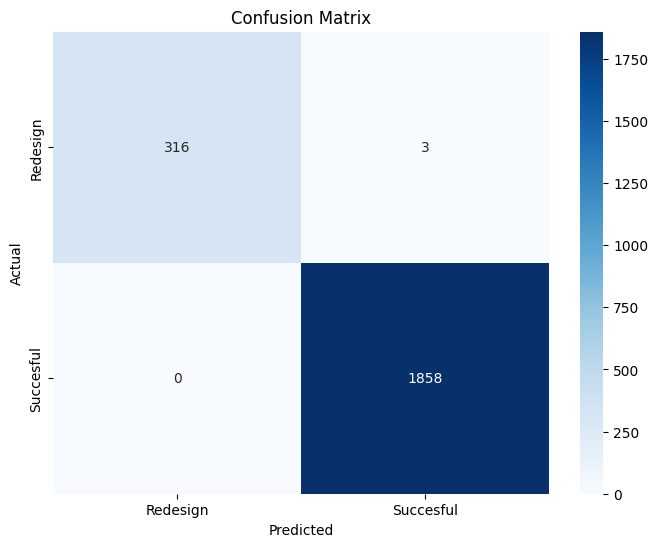

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Redesign', 'Succesful'],
            yticklabels=['Redesign', 'Succesful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

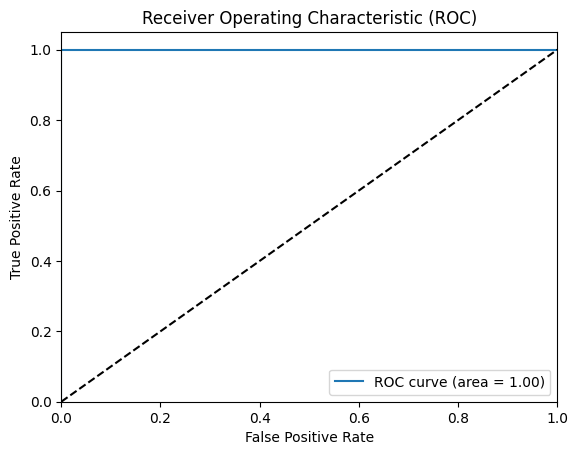

In [ ]:

y_probs = model.predict_proba(X_test)[:, 1]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)


fpr, tpr, thresholds = roc_curve(y_test_numeric, y_probs)
roc_auc = roc_auc_score(y_test_numeric, y_probs)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

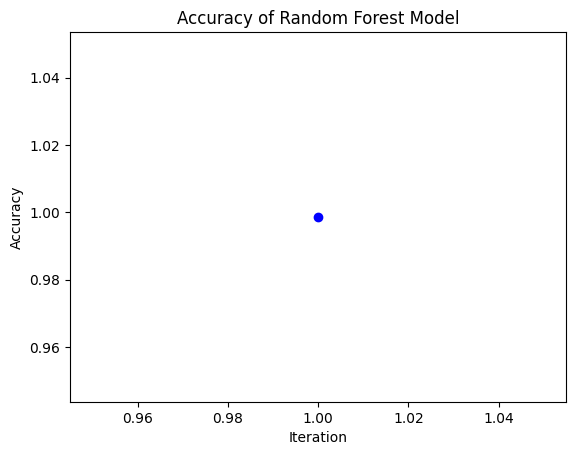

In [ ]:

accuracy = accuracy_score(y_test, y_pred)

plt.plot([1], [accuracy], marker='o', linestyle='-', color='b')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy of Random Forest Model")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("K-Nearest Neighbors Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

K-Nearest Neighbors Algorithm
              precision    recall  f1-score   support

    Redesign       0.98      0.96      0.97       319
   Succesful       0.99      1.00      0.99      1858

    accuracy                           0.99      2177
   macro avg       0.99      0.98      0.98      2177
weighted avg       0.99      0.99      0.99      2177

[[ 306   13]
 [   7 1851]]
ACC:  0.9908130454754249


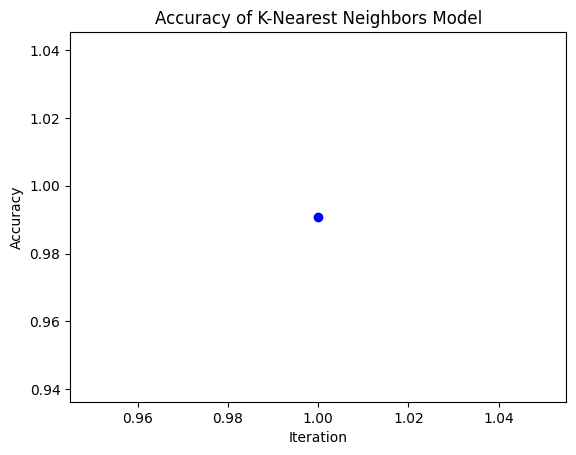

In [ ]:
# prompt: plot the graph

# Assuming 'y_test' and 'y_pred' are your actual and predicted values
accuracy = accuracy_score(y_test, y_pred)

# Plotting the accuracy
plt.plot([1], [accuracy], marker='o', linestyle='-', color='b')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy of K-Nearest Neighbors Model")
plt.show()

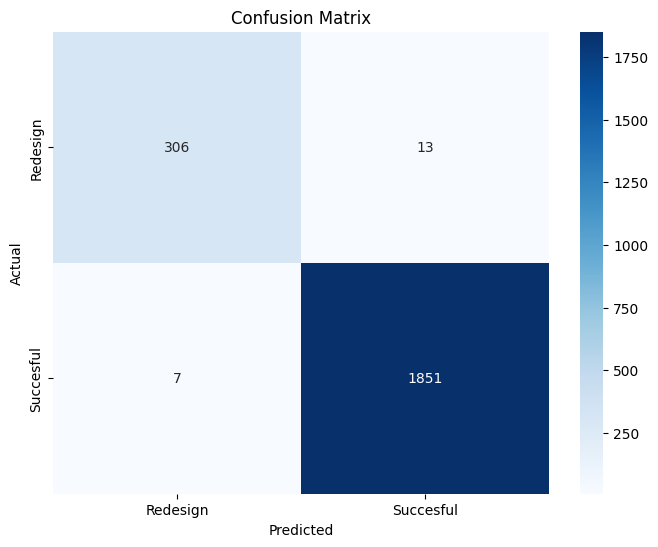

In [ ]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Redesign', 'Succesful'],
            yticklabels=['Redesign', 'Succesful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

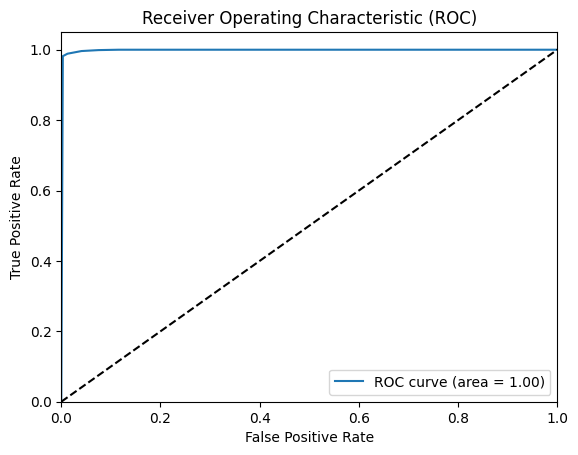

In [ ]:

y_probs = model.predict_proba(X_test)[:, 1]

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)


fpr, tpr, thresholds = roc_curve(y_test_numeric, y_probs)
roc_auc = roc_auc_score(y_test_numeric, y_probs)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Decision Tree Algorithm
              precision    recall  f1-score   support

    Redesign       1.00      1.00      1.00       319
   Succesful       1.00      1.00      1.00      1858

    accuracy                           1.00      2177
   macro avg       1.00      1.00      1.00      2177
weighted avg       1.00      1.00      1.00      2177

[[ 319    0]
 [   1 1857]]
ACC:  0.9995406522737712


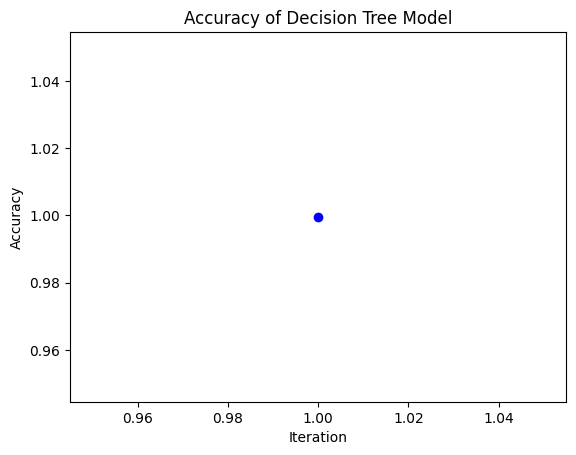

In [ ]:
# prompt: plot the graph

# Assuming 'y_test' and 'y_pred' are your actual and predicted values
accuracy = accuracy_score(y_test, y_pred)

# Plotting the accuracy
plt.plot([1], [accuracy], marker='o', linestyle='-', color='b')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy of Decision Tree Model")
plt.show()

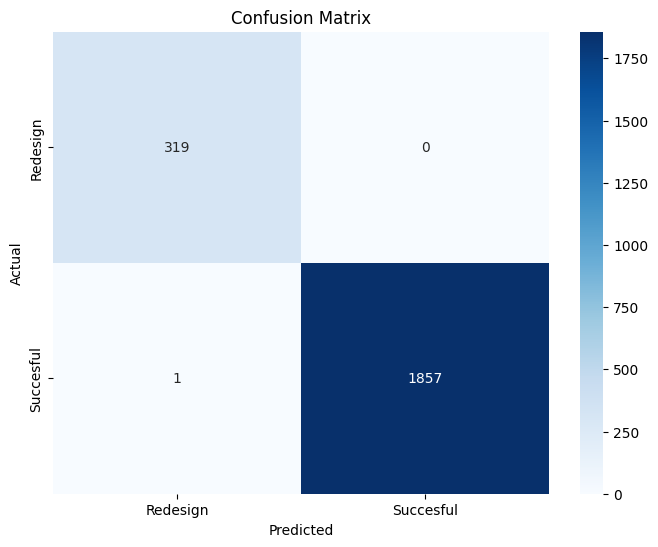

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Redesign', 'Succesful'],
            yticklabels=['Redesign', 'Succesful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

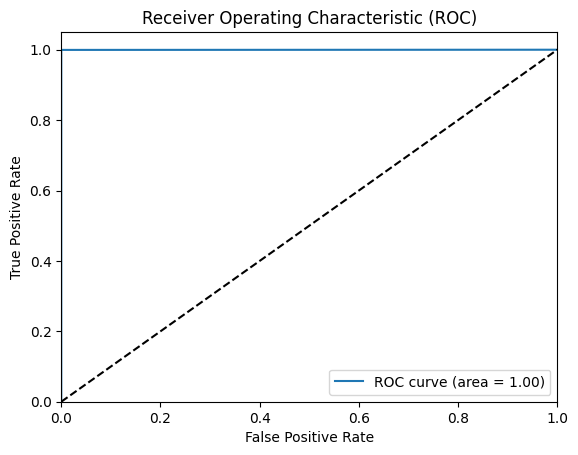

In [ ]:

y_probs = model.predict_proba(X_test)[:, 1]  # Assuming 'Succesful' is the positive class

# Convert string labels in y_test to numerical labels (0 and 1)
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test) #This line converts the string labels to numerical format for roc_curve


fpr, tpr, thresholds = roc_curve(y_test_numeric, y_probs) #Use the numeric y_test here
roc_auc = roc_auc_score(y_test_numeric, y_probs)  #Use the numeric y_test here

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

0:	learn: 0.5996981	total: 6.01ms	remaining: 595ms
1:	learn: 0.5231330	total: 11.3ms	remaining: 552ms
2:	learn: 0.4608420	total: 15.5ms	remaining: 500ms
3:	learn: 0.4067194	total: 19.7ms	remaining: 473ms
4:	learn: 0.3604636	total: 24.6ms	remaining: 467ms
5:	learn: 0.3205422	total: 29.5ms	remaining: 462ms
6:	learn: 0.2864316	total: 33.7ms	remaining: 447ms
7:	learn: 0.2563761	total: 37.9ms	remaining: 435ms
8:	learn: 0.2297162	total: 42ms	remaining: 424ms
9:	learn: 0.2064575	total: 46.2ms	remaining: 416ms
10:	learn: 0.1851933	total: 50.5ms	remaining: 408ms
11:	learn: 0.1665037	total: 54.7ms	remaining: 401ms
12:	learn: 0.1502763	total: 58.7ms	remaining: 393ms
13:	learn: 0.1356418	total: 62.8ms	remaining: 386ms
14:	learn: 0.1225647	total: 67.4ms	remaining: 382ms
15:	learn: 0.1107841	total: 71.9ms	remaining: 377ms
16:	learn: 0.1002239	total: 76.8ms	remaining: 375ms
17:	learn: 0.0906153	total: 80.8ms	remaining: 368ms
18:	learn: 0.0823267	total: 84.9ms	remaining: 362ms
19:	learn: 0.0746546	tot

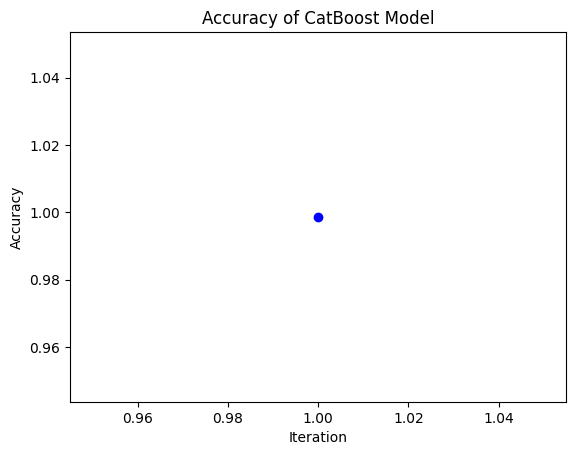

In [ ]:

!pip install catboost

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X and Y are defined as in your previous code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create a CatBoostClassifier model
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("CatBoost Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ACC:", accuracy_score(y_test, y_pred))

# Assuming 'y_test' and 'y_pred' are your actual and predicted values
accuracy = accuracy_score(y_test, y_pred)

# Plotting the accuracy
plt.plot([1], [accuracy], marker='o', linestyle='-', color='b')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy of CatBoost Model")
plt.show()

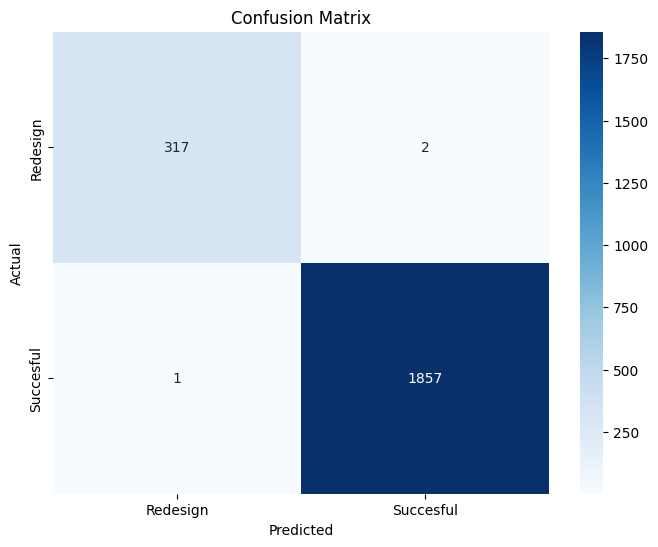

In [ ]:

# Assuming y_test and y_pred are defined from your model's predictions
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Redesign', 'Succesful'],
            yticklabels=['Redesign', 'Succesful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

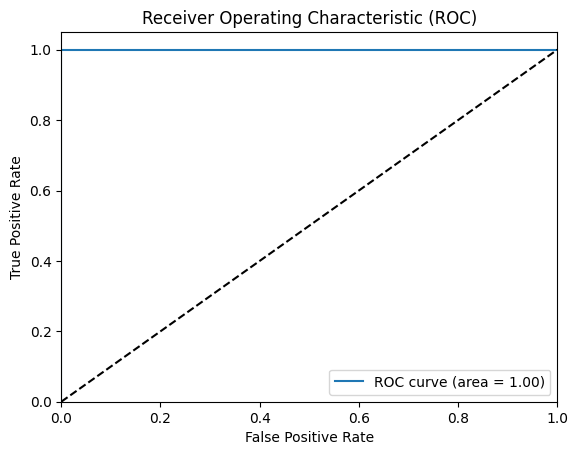

In [ ]:

# Assuming y_test and y_pred are defined from your model's predictions
y_probs = model.predict_proba(X_test)[:, 1]  # Assuming 'Succesful' is the positive class

# Convert string labels in y_test to numerical labels (0 and 1)
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test) #This line converts the string labels to numerical format for roc_curve


fpr, tpr, thresholds = roc_curve(y_test_numeric, y_probs) #Use the numeric y_test here
roc_auc = roc_auc_score(y_test_numeric, y_probs)  #Use the numeric y_test here

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:


!pip install xgboost
#XGBoost for classification
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess the dataset (assuming df_cleaned is the cleaned dataset)
# Separate features and target (assuming 'defects' is the target)
X = df_cleaned.drop('defects', axis=1)
y = df_cleaned['defects']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBClassifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, verbosity=0)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8084
Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.96      0.89      1757
        True       0.51      0.17      0.25       419

    accuracy                           0.81      2176
   macro avg       0.67      0.56      0.57      2176
weighted avg       0.77      0.81      0.77      2176



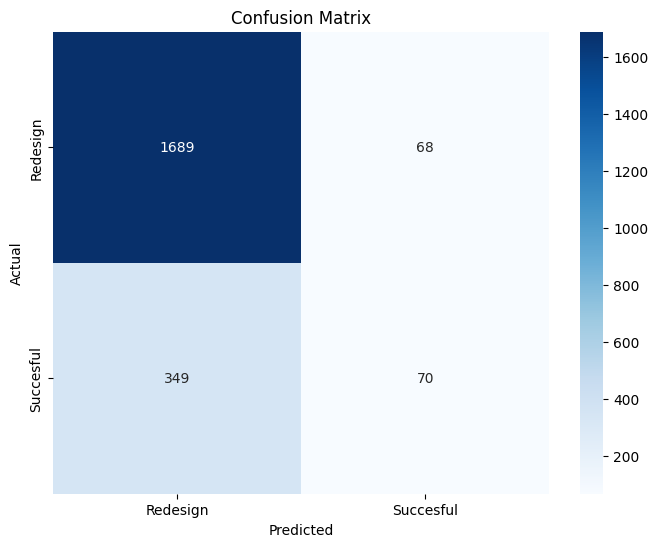

In [ ]:
# prompt: print the confusion matrix

# Assuming y_test and y_pred are defined from your model's predictions
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Redesign', 'Succesful'],
            yticklabels=['Redesign', 'Succesful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

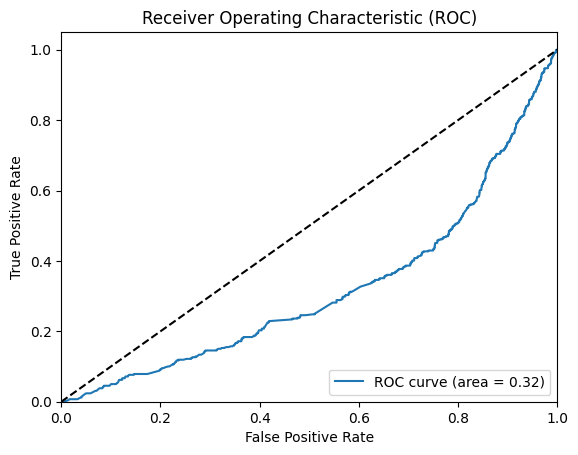

In [ ]:

# Assuming y_test and y_pred are defined from your model's predictions
y_probs = model.predict_proba(X_test)[:, 1]  # Assuming 'Succesful' is the positive class

# Convert string labels in y_test to numerical labels (0 and 1)
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test) #This line converts the string labels to numerical format for roc_curve


fpr, tpr, thresholds = roc_curve(y_test_numeric, y_probs) #Use the numeric y_test here
roc_auc = roc_auc_score(y_test_numeric, y_probs)  #Use the numeric y_test here

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# ADaboost for classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess the dataset (assuming df_cleaned is the cleaned dataset)
# Separate the features and target (assuming 'defects' is the target)
X = df_cleaned.drop('defects', axis=1)
y = df_cleaned['defects']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)

# Train the model
ada_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ada_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Accuracy: 0.8074
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.97      0.89      1757
        True       0.50      0.13      0.20       419

    accuracy                           0.81      2176
   macro avg       0.66      0.55      0.55      2176
weighted avg       0.76      0.81      0.76      2176



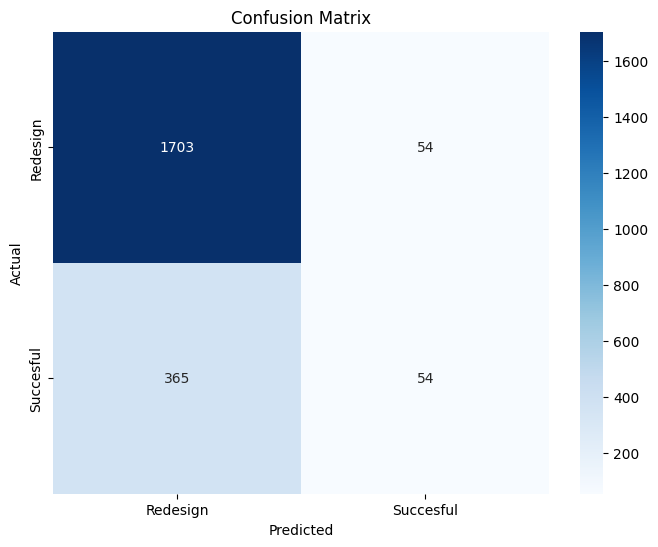

In [ ]:

# Assuming y_test and y_pred are defined from your model's predictions
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Redesign', 'Succesful'],
            yticklabels=['Redesign', 'Succesful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

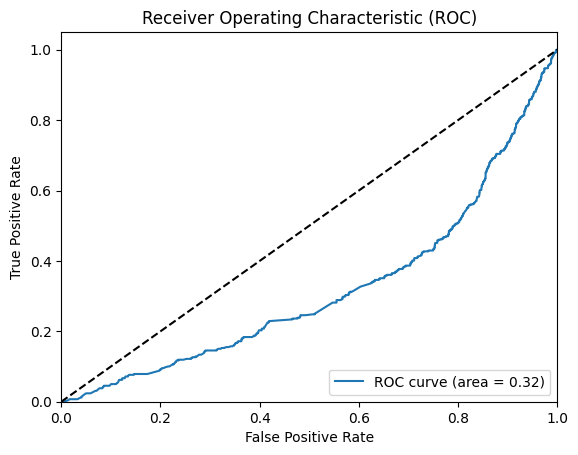

In [ ]:

from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred are defined from your model's predictions
y_probs = model.predict_proba(X_test)[:, 1]  # Assuming 'Succesful' is the positive class

# Convert string labels in y_test to numerical labels (0 and 1)
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test) #This line converts the string labels to numerical format for roc_curve


fpr, tpr, thresholds = roc_curve(y_test_numeric, y_probs) #Use the numeric y_test here
roc_auc = auc(fpr, tpr)  #Use the numeric y_test here

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

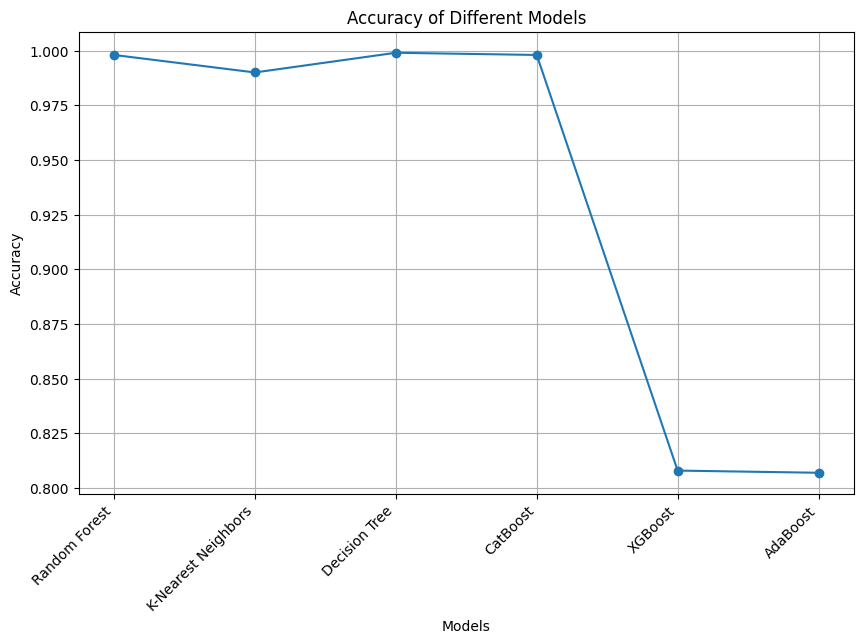

In [ ]:
accuracies = [
    0.998,
    0.990,  # Replace with your actual accuracy values for K-Nearest Neighbors
    0.999,  # Replace with your actual accuracy values for Decision Tree
    0.998,  # Replace with your actual accuracy values for CatBoost
    0.808,  # Replace with your actual accuracy values for XGBoost
    0.807  # Replace with your actual accuracy values for AdaBoost
]

model_names = [
    "Random Forest",
    "K-Nearest Neighbors",
    "Decision Tree",
    "CatBoost",
    "XGBoost",
    "AdaBoost"  # Add names for all your models
]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o', linestyle='-')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

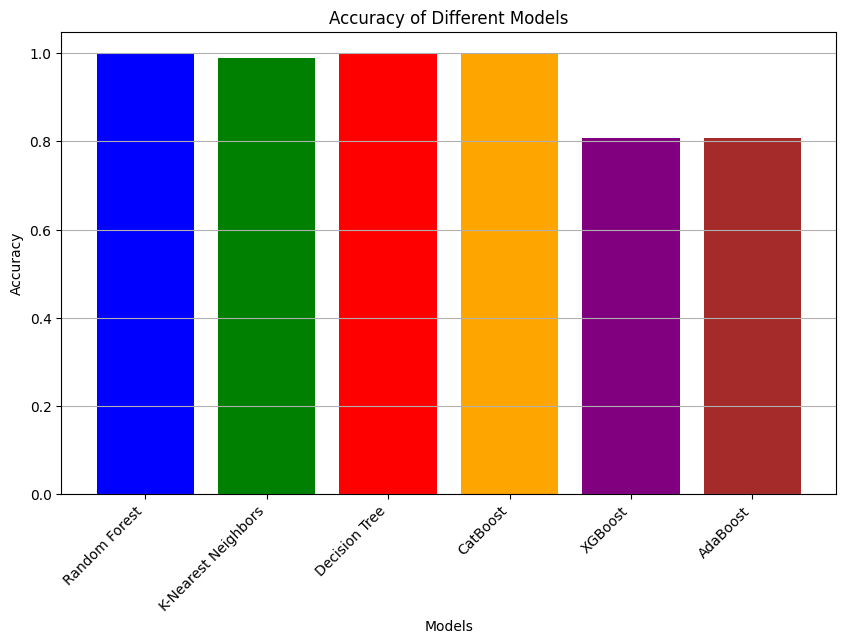

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of accuracies from your models
accuracies = [
    0.998,  # Replace with your actual accuracy values for Random Forest
    0.990,  # Replace with your actual accuracy values for K-Nearest Neighbors
    0.999,  # Replace with your actual accuracy values for Decision Tree
    0.998,  # Replace with your actual accuracy values for CatBoost
    0.808,  # Replace with your actual accuracy values for XGBoost
    0.807  # Replace with your actual accuracy values for AdaBoost
]

model_names = [
    "Random Forest",
    "K-Nearest Neighbors",
    "Decision Tree",
    "CatBoost",
    "XGBoost",
    "AdaBoost"  # Add names for all your models
]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'orange', 'purple', 'brown'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.show()

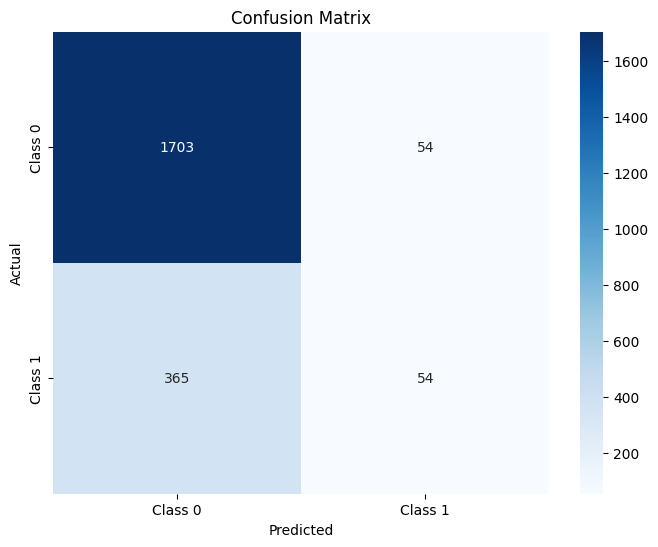

In [ ]:
# prompt: print confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are defined from your model's predictions
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

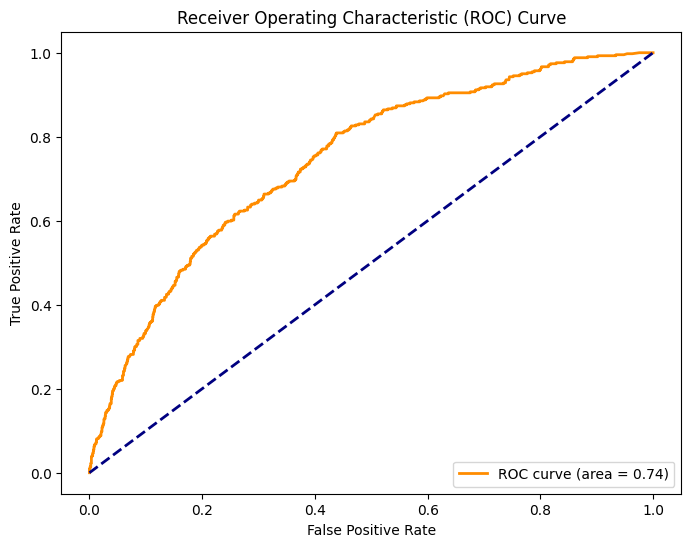

In [ ]:
# prompt: generate code for ROC curve

from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred_prob are defined from your model's predictions (probabilities)
# If you only have predictions (0 or 1), you need to get probabilities using model.predict_proba
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# prompt: generate code for testing

import unittest
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Mock data for testing
df_mock = pd.DataFrame({
    'n': [100, 200, 300, 400, 500],
    'v': [500, 600, 700, 800, 900],
    'd': [20, 30, 40, 50, 60],
    'e': [200000, 300000, 400000, 500000, 600000],
    't': [2000, 3000, 4000, 5000, 6000],
    'defects': [0, 0, 1, 1, 0],
})


class TestProject(unittest.TestCase):

    def test_evaluation_control(self):
        # Test the evaluation_control function
        evaluation_control(df_mock)
        self.assertTrue('complexityEvaluation' in df_mock.columns)


    def test_random_forest(self):
        # Test Random Forest model training and prediction
        X = df_mock.iloc[:, :-1]
        y = df_mock['defects']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        model = RandomForestClassifier(n_estimators=100)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        self.assertGreater(accuracy, 0.5)


    def test_knn(self):
        # Test K-Nearest Neighbors model training and prediction
        X = df_mock.iloc[:, :-1]
        y = df_mock['defects']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        model = KNeighborsClassifier(n_neighbors=5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        self.assertGreater(accuracy, 0.5)


    def test_decision_tree(self):
        # Test Decision Tree model training and prediction
        X = df_mock.iloc[:, :-1]
        y = df_mock['defects']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        model = tree.DecisionTreeClassifier()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        self.assertGreater(accuracy, 0.5)


    def test_catboost(self):
        # Test CatBoost model training and prediction
        X = df_mock.iloc[:, :-1]
        y = df_mock['defects']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        self.assertGreater(accuracy, 0.5)


    def test_xgboost(self):
        # Test XGBoost model training and prediction
        X = df_mock.iloc[:, :-1]
        y = df_mock['defects']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, verbosity=0)
        xgb_model.fit(X_train, y_train)
        y_pred = xgb_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        self.assertGreater(accuracy, 0.5)


    def test_adaboost(self):
        # Test AdaBoost model training and prediction
        X = df_mock.iloc[:, :-1]
        y = df_mock['defects']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
        ada_model.fit(X_train, y_train)
        y_pred = ada_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        self.assertGreater(accuracy, 0.5)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

.FF.E

0:	learn: 0.6822075	total: 176us	remaining: 17.5ms
1:	learn: 0.6715316	total: 1.06ms	remaining: 52.2ms
2:	learn: 0.6641922	total: 1.52ms	remaining: 49.1ms
3:	learn: 0.6539289	total: 1.87ms	remaining: 44.9ms
4:	learn: 0.6507055	total: 2.22ms	remaining: 42.2ms
5:	learn: 0.6407789	total: 2.56ms	remaining: 40.1ms
6:	learn: 0.6339109	total: 3.14ms	remaining: 41.7ms
7:	learn: 0.6305506	total: 3.51ms	remaining: 40.4ms
8:	learn: 0.6210786	total: 3.85ms	remaining: 38.9ms
9:	learn: 0.6118239	total: 4.18ms	remaining: 37.6ms
10:	learn: 0.6090316	total: 4.61ms	remaining: 37.3ms
11:	learn: 0.6026493	total: 4.94ms	remaining: 36.2ms
12:	learn: 0.5963584	total: 5.38ms	remaining: 36ms
13:	learn: 0.5876655	total: 5.83ms	remaining: 35.8ms
14:	learn: 0.5791727	total: 6.2ms	remaining: 35.1ms
15:	learn: 0.5732372	total: 6.63ms	remaining: 34.8ms
16:	learn: 0.5673917	total: 7.03ms	remaining: 34.3ms
17:	learn: 0.5616336	total: 7.37ms	remaining: 33.6ms
18:	learn: 0.5559604	total: 7.75ms	remaining: 33ms
19:	learn

F.
ERROR: test_knn (__main__.TestProject)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-36-5b3891230e03>", line 55, in test_knn
    y_pred = model.predict(X_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 271, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 834, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 5, n_samples_fit = 4, n_samples = 1

FAIL: test_catboost (__main__.TestProject)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-36-5b3891230e03>", line 81, in test_catboost
    self.assertGreater(accuracy, 0.5)
AssertionError: 0.0 not greater than 0.5

FAIL: test_decision_tree (__main__.TestProject)
--------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-p

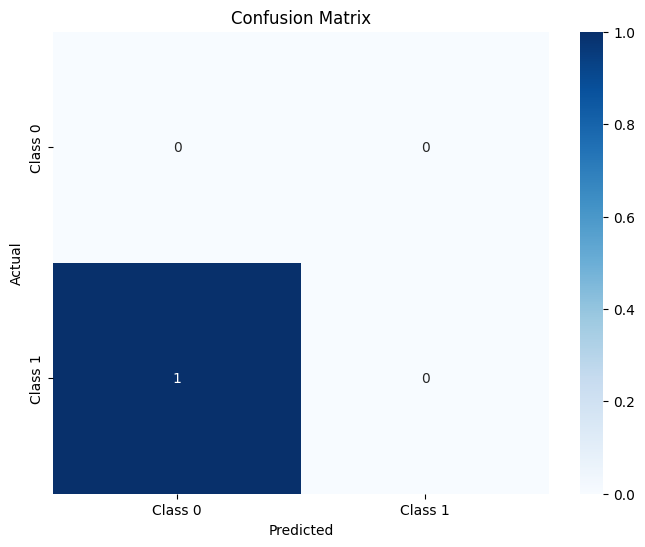

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1174: UndefinedMetricWarning:

No negative samples in y_true, false positive value should be meaningless



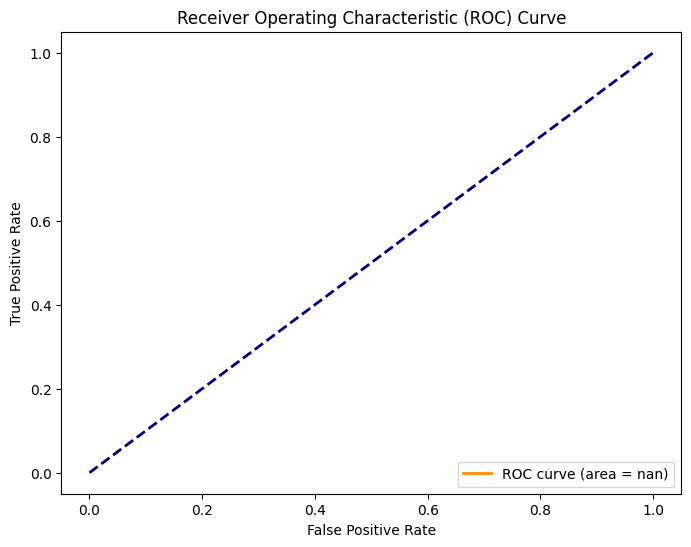

.
----------------------------------------------------------------------
Ran 1 test in 0.011s

OK


In [ ]:
# prompt: i want testing with graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py # Importing plotly from the chart_studio package
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import os
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import unittest

# Assuming 'df' is your DataFrame and it contains the data you want to analyze
# ... (Your existing code to load and prepare the data) ...

# Create a mock DataFrame for testing purposes
df_mock = pd.DataFrame({
    'n': [100, 200, 300, 400, 500],
    'v': [500, 600, 700, 800, 900],
    'd': [20, 30, 40, 50, 60],
    'e': [200000, 300000, 400000, 500000, 600000],
    't': [2000, 3000, 4000, 5000, 6000],
    'defects': [0, 0, 1, 1, 0],
})

# Example of testing your functions or models with df_mock

class TestProject(unittest.TestCase):

    def test_evaluation_control(self):
        # Test the evaluation_control function
        evaluation_control(df_mock)
        self.assertTrue('complexityEvaluation' in df_mock.columns)

    # Add more tests for other functions or models

# Assuming df_cleaned is the cleaned dataset with features and target 'defects'
# You can update this based on your actual dataset
df_cleaned = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [6, 7, 8, 9, 10],
    'defects': [0, 1, 0, 1, 0],
})

# Separate features and target
X = df_cleaned.drop('defects', axis=1)
y = df_cleaned['defects']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the XGBClassifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, verbosity=0)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Assuming y_test and y_pred are defined from your model's predictions
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Assuming y_test and y_pred_prob are defined from your model's predictions (probabilities)
# If you only have predictions (0 or 1), you need to get probabilities using model.predict_proba
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)